In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Dummy Variable Trap

In [4]:
y=df['Exited']
geography = pd.get_dummies(df['Geography'],prefix='geo')
gender = pd.get_dummies(df['Gender'],prefix='gender')
gender=gender.drop(['gender_Female'],axis=1)
df = pd.concat([df,geography,gender],axis=1)
df=df.drop(['Geography','Gender','Exited'],axis=1)
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain,gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [5]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain,gender_Male
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,0.008590,-0.000044,-0.009905,0.018196
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.004049,-0.003097,0.007800,-0.002641
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.008928,0.005538,0.004780,-0.002857
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.039208,0.046897,-0.001685,-0.027544
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.002848,-0.000567,0.003868,0.014733
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.231329,0.401110,-0.134892,0.012087
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.001230,-0.010419,0.009039,-0.021859
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.002467,0.010577,-0.013480,0.005766
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.003317,-0.020486,0.016732,0.022544
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,-0.003332,0.010297,-0.006482,-0.008112


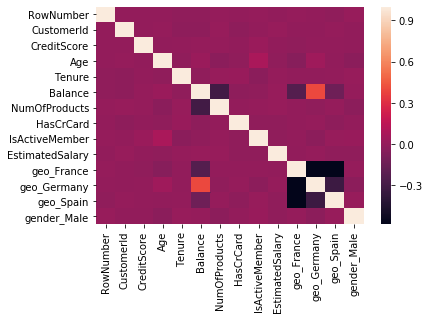

In [6]:
import seaborn as sns
sns.heatmap(df.corr())

In [7]:
X=df.iloc[:,3:14].values
X

array([[619.,  42.,   2., ...,   1.,   0.,   0.],
       [608.,  41.,   1., ...,   0.,   0.,   1.],
       [502.,  42.,   8., ...,   1.,   0.,   0.],
       ...,
       [709.,  36.,   7., ...,   1.,   0.,   0.],
       [772.,  42.,   3., ...,   0.,   1.,   0.],
       [792.,  28.,   4., ...,   1.,   0.,   0.]])

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [11]:
# Initialising the ANN
classifier=Sequential()

In [12]:
# Adding the input and the first hidden layer
classifier.add(Dense(output_dim=6,init='uniform',activation='relu',input_dim=11))

In [13]:
#Adding the second layer
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))

In [14]:
#Adding the output layer
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

In [15]:
# Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
#Fitting the ANN to the training set
history=classifier.fit(X,y,validation_split=0.2,batch_size=10,nb_epoch=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 2s 305us/step - loss: 0.4928 - accuracy: 0.7996 - val_loss: 0.4240 - val_accuracy: 0.8170loss: 0.5
Epoch 2/100
8000/8000 [==============================] - 2s 238us/step - loss: 0.4163 - accuracy: 0.8199 - val_loss: 0.4080 - val_accuracy: 0.8270
Epoch 3/100
8000/8000 [==============================] - 1s 155us/step - loss: 0.4015 - accuracy: 0.8288 - val_loss: 0.3963 - val_accuracy: 0.8275
Epoch 4/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.3917 - accuracy: 0.8282 - val_loss: 0.3859 - val_accuracy: 0.8335
Epoch 5/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.3839 - accuracy: 0.8315 - val_loss: 0.3830 - val_accuracy: 0.8335
Epoch 6/100
8000/8000 [==============================] - 1s 172us/step - loss: 0.3789 - accuracy: 0.8345 - val_loss: 0.3774 - val_accuracy: 0.8405
Epoch 7/100
8000/8000 [==============================] - 2s 2

8000/8000 [==============================] - 2s 228us/step - loss: 0.3406 - accuracy: 0.8589 - val_loss: 0.3490 - val_accuracy: 0.8575
Epoch 57/100
8000/8000 [==============================] - 2s 249us/step - loss: 0.3411 - accuracy: 0.8601 - val_loss: 0.3536 - val_accuracy: 0.8570
Epoch 58/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.3405 - accuracy: 0.8601 - val_loss: 0.3468 - val_accuracy: 0.8590
Epoch 59/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.3399 - accuracy: 0.8616 - val_loss: 0.3487 - val_accuracy: 0.8580
Epoch 60/100
8000/8000 [==============================] - 2s 245us/step - loss: 0.3402 - accuracy: 0.8601 - val_loss: 0.3486 - val_accuracy: 0.8605
Epoch 61/100
8000/8000 [==============================] - 2s 215us/step - loss: 0.3401 - accuracy: 0.8596 - val_loss: 0.3489 - val_accuracy: 0.8575
Epoch 62/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.3401 - accuracy: 0.8583 - val_loss: 0.3534 

In [17]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1543,   52],
       [ 211,  194]], dtype=int64)

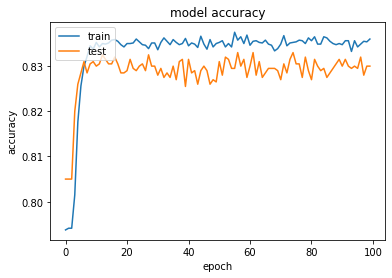

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

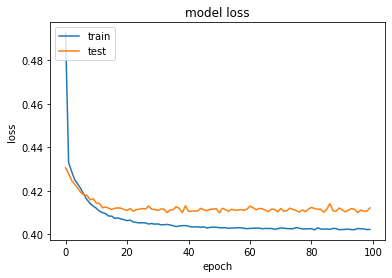

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()